# 1. 2021-06 제주대학교 파이썬을 활용한 머신러닝 응용

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SDSTony/2021-JNU-ML-lab-session/blob/main/notebook.ipynb)


강사: 안성진 <img src="https://github.com/kaggler-tv/dku-kaggle-class/blob/master/course-website/imgs/Sungjin.png?raw=true" width="5%" height="7%">

## 1.1 데이터과학 대회 소개

- 데이터과학 대회: **주어진 기간** 동안 모델의 성능을 **경쟁적으로** 높이는 **배움의 장**
    - `주어진 기간`: 대회 기간
        - 종료된 대회 참여시 기한 없음
    - `경쟁적으로`: 참가자들과 공개 리더보드를 통한 경쟁
        - 나의 현재 위치를 확인하며 지속적인 동기부여와 성취감
    - `배움의 장`: 다양한 데이터에 여러 머신러닝 기법을 적용해보면서 배우는 PBL(Project Based Learning)

- 참가 이유

    - 재미, 배움, **경력 개발**을 실현할 수 있는 기회
    ![image.png](https://drive.google.com/uc?id=1DdVFF_PXr3fAcCsZgiS6LK7TgDWM8ZFB) 
        - 대회 출전자/수상자 우대 예시 1

    ![image.png](https://drive.google.com/uc?id=1tzGofJu2h7Hmd6VlaO4DCYPEH_fmDPZq)
        - 대회 출전자/수상자 우대 예시 2
    - 나의 가설이 맞았을 때 느끼는 카타르시스




## 1.2 머신러닝 파이프라인/실험과정 소개

- 데이터과학 대회(머신러닝 응용 프로젝트)를 위한 모델 구축 파이프라인은 아래와 같습니다. 

![image.png](https://drive.google.com/uc?id=1eoPn1YGwWs1wIHYKXsaVdzagbgSabH0y)

- 먼저 데이터를 불러옵니다. 
- 불러온 데이터에 대한 탐색을 진행합니다. 
- 간단한 베이스라인 모델을 구축합니다. 
- 최적의 모델 탐색 과정을 반복하여 모델의 성능을 고도화 합니다. 
- 최종 모델을 산출합니다. 

In [ ]:
# 한글폰트 사용 in colab #출처: https://velog.io/@jonsyou/colabsetting1
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

1. 위 코드를 한번 실행 시킨다
2. 런타임 > 런타임 다시 시작 을 누른다.
3. 다시 한번 더 위 코드를 실행 시킨다. 

In [ ]:
!pip install -U scikit-learn

## 1.3 Pandas 탐색


In [2]:
# 데이터 접근을 위해 구글 드라이브에 연결
# 데이터는 본인 구글 드라이브에 업로드
# https://chancoding.tistory.com/103 참고
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 

In [4]:
# 데이터 불러오기
path = '/content/drive/MyDrive/04. 데이콘/09. 데이콘 제주대 2021/data'
train = pd.read_csv(path + '/train.csv')
# 실습
test = pd.read_csv(path + '/test.csv')
submission = pd.read_csv(path + '/sample_submission.csv')

#### pd.DataFrame.head()

In [ ]:
train.head()

In [ ]:
train.tail()

- 전처리 할 수 있는 것들
    - 문자열 컬럼
        - ordinal 인코딩
        - one-hot 인코딩
        - etc.
    - 음수로 입력된 컬럼
    - 결측값
        - 최빈값
        - 제거
        - etc.
- 여러 실험/가설들을 생각해볼 수 있음

In [ ]:
test.head()

In [ ]:
submission.head()

#### log loss

- 분류 모델 평가 시 사용
- 모델이 예측한 확률을 직접적으로 반영하여 계산

    - 예시) 3 곱하기 5는? (1점)

|        | 학생 A | 학생 B |
| ------ | ------ | ------ |
| (1) 15 |**0.99**   | **0.2**   |
| (2) 2  | 0      | 0.2    |
| (3) 8  | 0.01   | 0.2    |
| (4) 1  | 0      | 0.2    |
| (5) -2 | 0      | 0.2    |

- 학생 A, 학생 B 모두 1번을 선택했으나 학생 A는 확신에 찬 상태로 선택했으며 학생 B는 찍었음
- accuracy(정확도)로 평가를 하게 되면 맞춘 여부만 고려하기 때문에 두 학생 모두 1점을 획득
- 확률 값으로 점수를 매기면 학생 A는 0.99점, 학생 B는 0.2점을 획득
- log loss는 확률 값을 음의 로그 취한뒤 평균을 산출

![](https://miro.medium.com/max/1162/0*i2_eUc_t8A1EJObd.png)
- 출처: [medium](https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428)

- **참고)** 모델 평가시에는 확률값 산출이 가능하지만, 현실 세계에서는 학생이 해당 답을 선택한 확률을 알기 어려움
- [log loss에 대해 알아보자 영상](https://www.youtube.com/watch?v=i5U2inxzXx4) 참고


#### pd.DataFrame.shape

In [ ]:
train.shape, test.shape, submission.shape

#### pd.DataFrame.info()

In [ ]:
train.info()

#### pd.DataFrame.select_dtypes(include=[ ])

- object: 문자열
- int64, float64: 정수, 실수

In [ ]:
train.select_dtypes(include=['object'])

In [ ]:
train.select_dtypes(include=['int64', 'float64'])

#### pd.DataFrame.groupby()

In [ ]:
train[['occyp_type', 'credit']].groupby(['occyp_type']).mean().sort_values(by='credit')

Q. edu_type 범주별 credit의 평균을 오름차순으로 나렬하시오.

#### pd.DataFrame.agg()

In [ ]:
train[['occyp_type', 'credit']].groupby(['occyp_type']).agg(['mean', 'count', 'min', 'max']).droplevel(level=0, axis=1)

#### pd.DataFrame.describe()

In [ ]:
train.describe()

#### pd.DataFrame.plot()

- pandas만 사용해서 기본적인 시각화 가능
- 인사이트를 도출하기 위해 사용

kind : str

- `line` : line plot (default)
- `bar` : vertical bar plot
- `barh` : horizontal bar plot
- `hist` : histogram
- `box` : boxplot
- `scatter` : scatter plot

In [ ]:
train.plot(x='child_num', y='credit', kind='scatter')

In [ ]:
train.plot(x='DAYS_EMPLOYED', y='DAYS_BIRTH', kind='scatter', alpha=0.2)

- 데이터 탐색 과정에서 데이터에 대한 이해도 증가
    - 위 예시에서는 이상치 발견

- 도메인 지식이 없을 때는 모든 컬럼을 하나씩 탐색 하면서 인사이트 도출, 이상치 탐지, 실험 아이디어 기록을 하게 되서, 일반적으로 가장 많이 시간 투자하는 단계

- 도메인 지식을 알고 있으면 효율적인 탐색 시작 위치를 알고 있기 때문에 탐색 시간이 줄어들 수 있음

In [ ]:
train[train['DAYS_EMPLOYED'] < 0].plot(x='DAYS_EMPLOYED', y='DAYS_BIRTH', kind='scatter', alpha=0.01)

In [ ]:
train['DAYS_EMPLOYED'].describe()

In [ ]:
train[train['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].unique()

#### 튜토리얼 보면서, 본인 데이터에 적용해보기

- 일반적으로 시각화를 할 때 다양한 기능을 외우는 것도 좋지만, 공식 문서를 함께 참조하여 사용합니다. 
- 시각화를 할 때 다양한 공개 문서를 참조하여 본인 데이터에 적용하는 방법을 실습해보겠습니다. 
- 함수가 입력받는 데이터 형태를 확인
- [공개된 코드 예시](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)


In [ ]:
import numpy as np 

df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.plot.bar()

In [ ]:
df2

In [ ]:
train[['edu_type', 'credit']].value_counts().reset_index().pivot(index='edu_type', columns='credit', values=0).plot.barh()

참고자료

- [Pandas 10분 완성](https://dataitgirls2.github.io/10minutes2pandas/)
    - [데잇걸즈](https://dataitgirls3.github.io/) 단체에서 번역한 pandas 튜토리얼
- [Pandas 공식 튜토리얼](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook)
    - Pandas 공식 홈페이지에서 제공하는 문서

- [Pandas 공식 시각화 튜토리얼](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## 1.4 Matplotlib, Seaborn 탐색

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train.head()

[샘플 코드](https://www.python-graph-gallery.com/basic-barplot-with-seaborn) 확인 후 `occyp_type`별 `credit`의 평균을 막대그리프로 시각화 해보기 (estimator는 np.mean 으로 설정)

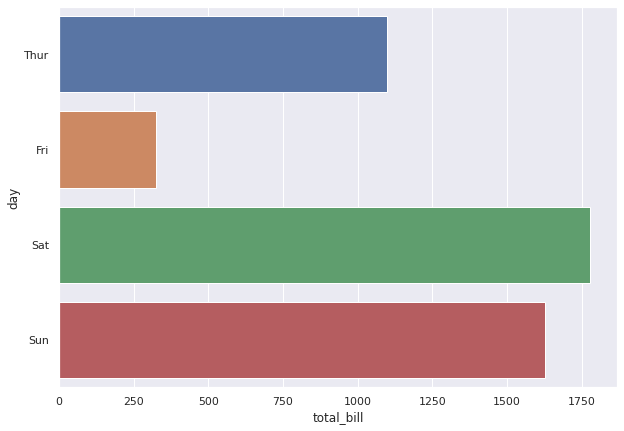

In [9]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = sns.load_dataset("tips")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="total_bill", 
    y="day", 
    data=tips, 
    estimator=sum, 
    ci=None)

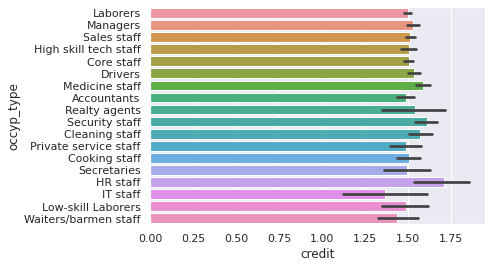

참고자료

- [Matplotlib.pyplot 기본 튜토리얼, 스타일, 캔버스](https://teddylee777.github.io/visualization/matplotlib-tutorial)
- [Matplotlib을 활용한 데이터 시각화 그래프 예제](https://teddylee777.github.io/visualization/matplotlib-tutorial-2)
- [Seaborn의 통계 차트 및 데이터 시각화 예제](https://teddylee777.github.io/visualization/seaborn-tutorial-1)
- [Python Graph Gallery](https://www.python-graph-gallery.com/)

## 1.5 베이스라인 모델 구축

- 베이스라인으로 로지스틱회귀 모델을 사용해보겠습니다. 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model

## 1.6 모델 검증 방법

![image.png](https://drive.google.com/uc?id=1zZpBaXpYszxISryqKWY_ECt13tDWumUE)

- K Fold 교차검증 (Cross-Valdation)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import numpy as np

In [ ]:
train.head()

In [ ]:
# numeric column만 추출 
num_features = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month']
trn = train[num_features].values
y = train['credit'].values
tst = test[num_features].values

In [ ]:
trn

In [ ]:
trn.shape, y.shape, tst.shape

In [ ]:
n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [ ]:
cv

In [ ]:
# 입력 값의 형태 파악이 중요
result_val = np.zeros((trn.shape[0], 3)) # 600 X 3 행렬 생성
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    model = LogisticRegression()
    model.fit(trn[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

In [ ]:
log_loss(y, np.zeros((trn.shape[0], 3)))

In [ ]:
log_loss(y, result_val)

In [ ]:
result_val.shape

In [ ]:
np.savetxt('logistic_cv.txt', result_val, fmt='%.6f', delimiter=',')
np.savetxt('logistic_tst.txt', result_tst, fmt='%.6f', delimiter=',')

참고자료

- [모델 성능 평가 지표 (회귀 모델, 분류 모델)](https://rk1993.tistory.com/entry/%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-%ED%9A%8C%EA%B7%80-%EB%AA%A8%EB%8D%B8-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8)
- [Cross-Validation, Stacking](https://kaggler-tv.github.io/dku-kaggle-class/lectures/08-cv-stacking.html)

## 1.7 범주형 데이터 전처리 방법

### 1.7.1 ordinal/label 인코딩

![](https://miro.medium.com/max/700/1*kPKvp4c462GB1NS8UotXYQ.png)

- 출처: [medium](https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24)

In [ ]:
train.head()

In [ ]:
train.info()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
train_cat = train.copy()
oe = OrdinalEncoder()
# categorical columns
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type']
train_cat[cat_cols] = oe.fit_transform(train_cat[cat_cols])
train_cat[cat_cols].head()

In [ ]:
test_cat = test.copy()
test_cat[cat_cols] = oe.transform(test_cat[cat_cols])
test_cat[cat_cols]

In [ ]:
features = num_features + cat_cols
trn = train_cat[features].values
y = train_cat['credit'].values
tst = test_cat[features].values

In [ ]:
n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [ ]:
result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    model = LogisticRegression()
    model.fit(trn[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

In [ ]:
log_loss(y, result_val)

### 1.7.2 one-hot 인코딩


![](https://miro.medium.com/max/2120/1*hZLqbZqqrwiqkGxxl2vYkg.png)

- 출처: [medium](https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24)

In [ ]:
train.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type']
ohe_features = ohe.fit_transform(train[cat_cols]).toarray()

In [ ]:
for col in cat_cols:
    print(len(train[col].unique()))

In [ ]:
ohe_features.shape

In [ ]:
train_ohe_cat = np.concatenate([train[num_features].values, ohe_features], axis=1)

In [ ]:
len(num_features)

In [ ]:
train_ohe_cat.shape

In [ ]:
test_ohe_features = ohe.transform(test[cat_cols]).toarray()
test_ohe_cat = np.concatenate([test[num_features].values, test_ohe_features], axis=1)

In [ ]:
train_ohe_cat.shape, test_ohe_cat.shape

- `train_cat`, `test_cat`: categorical 변수를 ordinal 인코딩 한 데이터
- `train_ohe_cat`, `test_ohe_cat`: categorical 변수를 one-hot 인코딩 한 데이터

In [ ]:
trn = train_ohe_cat
y = train['credit'].values
tst = test_ohe_cat

In [ ]:
n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [ ]:
result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    model = LogisticRegression()
    model.fit(trn[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

In [ ]:
log_loss(y, result_val)

In [ ]:
result_val

## 1.8 알고리즘 변경을 통한 모델 고도화

### 1.8.1 결정트리

![](https://github.com/kaggler-tv/dku-kaggle-class/blob/master/course-website/imgs/ch06-img15.jpg?raw=true)

- 출처: [dku-kaggle-class](https://kaggler-tv.github.io/dku-kaggle-class/lectures/06-scikit-learn.html#id2)

- [시각화로 보는 결정트리](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## ordinal 인코딩
features = num_features + cat_cols
trn = train_cat[features].values
y = train['credit'].values
tst = test_cat[features].values

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    ###
    model = DecisionTreeClassifier(random_state=seed, min_samples_split=1000)
    ###
    model.fit(trn[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

In [ ]:
?DecisionTreeClassifier

In [ ]:
result_val

In [ ]:
log_loss(y, result_val)

### 1.8.2 랜덤포레스트

![](https://github.com/kaggler-tv/dku-kaggle-class/blob/master/course-website/imgs/ch07-img03.jpg?raw=true)

- 출처: [dku-kaggle-class](https://kaggler-tv.github.io/dku-kaggle-class/lectures/06-scikit-learn.html#id2)

주요 하이퍼파라미터

- n_estimators: 의사결정 나무의 개수
- max_depth: 최대 깊이
- min_samples_split: 가지를 나눌 때 필요한 최소 샘플 개수
- min_samples_leaf: 가지를 나눈 후 왼쪽, 오른쪽 노드 각각에 존재해야 하는 최소 샘플 개수 
- max_features: 사용할 피쳐 개수


In [ ]:
?RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## ordinal 인코딩
trn = train_cat[features].values
y = train['credit'].values
tst = test_cat[features].values

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    ###
    model = RandomForestClassifier(random_state=seed, n_jobs=-1, min_samples_split=30)
    ###
    model.fit(trn[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

In [ ]:
result_val

In [ ]:
log_loss(y, result_val)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

### one hot 인코딩
trn = train_ohe_cat
y = train['credit'].values
tst = test_ohe_cat

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    model = RandomForestClassifier(random_state=seed, n_jobs=-1, min_samples_split=30)
    model.fit(trn[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

print(log_loss(y, result_val))

In [ ]:
from sklearn.preprocessing import label_binarize

label_binarize(y, classes=[0,1,2])

In [ ]:
np.savetxt('rf_cv.txt', result_val, fmt='%.6f', delimiter=',')
np.savetxt('rf_tst.txt', result_tst, fmt='%.6f', delimiter=',')

### 1.8.3 lightGBM

![](https://github.com/kaggler-tv/dku-kaggle-class/blob/master/course-website/imgs/ch07-img07.jpg?raw=true)

- 출처: [dku-kaggle-class](https://kaggler-tv.github.io/dku-kaggle-class/lectures/06-scikit-learn.html#id2)

In [ ]:
?lgb.LGBMClassifier

In [ ]:
import lightgbm as lgb

## ordinal 인코딩
trn = train_cat[features].values
y = train['credit'].values
tst = test_cat[features].values

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    model = lgb.LGBMClassifier(n_estimators=150,
                         num_leaves=50,
                         learning_rate=0.01,
                         min_child_samples=50,
                         random_state=seed,
                         n_jobs=-1)
    model.fit(trn[i_trn], y[i_trn], 
              eval_set=[(trn[i_val], y[i_val])], 
              early_stopping_rounds=10,
              verbose=10)
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

print(log_loss(y, result_val))

In [ ]:
?lgb.LGBMClassifier

## 1.9 파이프라인 구축

- https://stackoverflow.com/questions/28178763/sklearn-use-pipeline-in-a-randomizedsearchcv

Pipeline: '명칭'과 '모델' 쌍을 같이 입력  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
column_trans = ColumnTransformer(
     [('category', OrdinalEncoder(), cat_cols)],
     remainder='passthrough')

In [ ]:
train.select_dtypes(['int', 'float']).columns

In [ ]:
train.info()

In [ ]:
num_features

In [ ]:
pipe = Pipeline([('col_trans', column_trans), ('dt', DecisionTreeClassifier(random_state=seed, min_samples_split=1000))]) # , 

In [ ]:
features

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## ordinal 인코딩
features = num_features + cat_cols
trn = train[features]
y = train['credit'].values
tst = test[features]

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    ###
    model = pipe
    ###
    model.fit(trn.loc[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn.loc[i_val])
    result_tst += model.predict_proba(tst) / n_fold

In [ ]:
from sklearn import set_config
set_config(display='diagram')   
# diplays HTML representation in a jupyter context
pipe

In [ ]:
log_loss(y, result_val)

참고자료

- [Column Transformer with Mixed Types](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)
- [Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html)


## 1.10 하이퍼파라미터 최적화

![그리드서치](https://trello-attachments.s3.amazonaws.com/5e0d387cd4f8ba5e8f790d8b/5e634450ee4a88284a40a05a/3e9490f6010aa32e74bfde07398ac603/image.png)

![](https://i.stack.imgur.com/cIDuR.png)

- 출처: [stack exchange](https://stats.stackexchange.com/questions/160479/practical-hyperparameter-optimization-random-vs-grid-search)

### 1.10.1 Grid Search

아래 범위로 탐색해보기

- `num_leaves`: [31]
- `min_child_samples`: [25, 100]
- `learning_rate`: [0.01, 0.003]
- `early_stopping_rounds`: [10]



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### num leaves 후보군  개수 * min_child_samples 후보군 개수 * learning_rate 후보군 개수

param_grid = {'num_leaves':[31],}
###

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

features = num_features + cat_cols
trn = train_cat[features].values
y = train['credit'].values
tst = test_cat[features].values

X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)

model = lgb.LGBMClassifier(random_state=seed, 
                          n_estimators=150, 
                          n_jobs=-1)

gs = GridSearchCV(estimator=model,
            param_grid=param_grid,
            scoring='neg_log_loss',
            cv=cv, 
            verbose=1)

gs.fit(X_trn, y_trn, eval_set=[(X_val, y_val)], verbose=50)

In [ ]:
X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)
X_trn.shape, y_trn.shape

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
import lightgbm as lgb

## ordinal 인코딩
features = num_features + cat_cols
trn = train_cat[features].values
y = train['credit'].values
tst = test_cat[features].values

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    ## ** 연산자 사용하기 
    model = lgb.LGBMClassifier(**gs.best_params_, n_jobs=-1, random_state=seed, n_estimators=150)
    model.fit(trn[i_trn], y[i_trn], 
              eval_set=[(trn[i_val], y[i_val])], 
              early_stopping_rounds=10,
              verbose=10)
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

print(log_loss(y, result_val))

In [ ]:
model

In [ ]:
gs.best_params_

In [ ]:
np.savetxt('lgb_cv.txt', result_val, fmt='%.6f', delimiter=',')
np.savetxt('lgb_tst.txt', result_tst, fmt='%.6f', delimiter=',')

### 1.10.2 Random Search

In [ ]:
for i in range(10, 100, 10):
    print(i)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

###
param_grid = {'num_leaves':range(18, 30, 5), 
              'min_child_samples':range(10, 100, 10),
              'learning_rate':[0.03, 0.01, 0.003],
              'early_stopping_rounds':[10]}
###

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

features = num_features + cat_cols
trn = train_cat[features].values
y = train['credit'].values
tst = test_cat[features].values

X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)

model = lgb.LGBMClassifier(random_state=seed, 
                          n_estimators=150, 
                          n_jobs=-1)

rs = RandomizedSearchCV(estimator=model,
            param_distributions=param_grid,
            n_iter=4,
            scoring='neg_log_loss',
            cv=cv, 
            verbose=1)

rs.fit(X_trn, y_trn, eval_set=[(X_val, y_val)], verbose=50)

In [ ]:
rs.best_params_

In [ ]:
rs.best_score_

## 1.11 앙상블

linear regression, random forest, lightgbm 예측값을 평균내어 결합해보겠습니다. 

In [ ]:
lr_cv = np.loadtxt('logistic_cv.txt', delimiter=',')
rf_cv = np.loadtxt('rf_cv.txt', delimiter=',')
lgb_cv = np.loadtxt('lgb_cv.txt', delimiter=',')

lr_tst = np.loadtxt('logistic_tst.txt', delimiter=',')
rf_tst = np.loadtxt('rf_tst.txt', delimiter=',')
lgb_tst = np.loadtxt('lgb_tst.txt', delimiter=',')


In [ ]:
y_pred = (lr_cv + rf_cv + lgb_cv) / 3

In [ ]:
y_pred

In [ ]:
y.shape, y_pred.shape

In [ ]:
log_loss(y, y_pred)

In [ ]:
y_tst_pred = (lr_tst + rf_tst + lgb_tst) / 3

In [ ]:
y_tst_pred.shape

In [ ]:
submission.head()

In [ ]:
submission.iloc[:, 1:] = y_tst_pred

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)

짧은 시간내 많은 개념들을 살펴보느라 혼란스러울 수도 있습니다. 개인 시간에 참고자료들을 활용해서 천천히 하나씩 개념을 복습하고 학습하시길 권장드립니다. 

하나씩 천천히 해내간다면 분명 좋은 결과가 있으리라 확신합니다. 감사합니다. 

## 강의

- [edwith](https://www.edwith.org/)
    - [텐서플로우로 시작하는 딥러닝 기초](https://www.edwith.org/boostcourse-dl-tensorflow)
    - [파이토치로 시작하는 딥러닝 기초](https://www.edwith.org/boostcourse-dl-pytorch)
    - [부스트캠프 AI Tech 2기 모집 안내](https://boostcamp.connect.or.kr/guide_ai.html)

- [Coursera](https://www.coursera.org/)
    - [기계 학습](https://www.coursera.org/learn/machine-learning#syllabus)

- [SK플래닛 T아카데미](https://tacademy.skplanet.com/frontMain.action)
    - [정형데이터 분석 기초](https://www.youtube.com/playlist?list=PL9mhQYIlKEhcaivg3ltnx3DS49AAIc3qv)
    - [캐글(Kaggle) 대회 & EDA](https://www.youtube.com/playlist?list=PL9mhQYIlKEhcAt2sm8l3BWx5DOFfhtYe4)


- 단국대 2020년 가을학기 캐글 뽀개기 강좌
    - [홈페이지](https://kaggler-tv.github.io/dku-kaggle-class/main.html)
    - [강의](https://www.youtube.com/watch?v=JjkoII5otj4&list=PLYF-I-Q8h6CtJNVw4VpOtXdlSz3hDvTjE)

## 커뮤니티

- 텐서플로우 코리아 - 국내 최대 텐서플로우 및 딥러닝 커뮤니티
    - [페이스북](https://www.facebook.com/groups/TensorFlowKR/)

- AI프렌즈 - 대덕연구단지를 기반으로 하며, 인공지능 기술을 공유하며 함께 성장하는 산-학-연 중심의 비영리 연구모임
    - [유튜브 채널](https://www.youtube.com/channel/UC2L1DgDMD5pJ-35G47Objfw)
    - [카카오톡 단톡방](https://open.kakao.com/o/ggewxi2)
    - [블로그](https://aifrenz.github.io/)

- 캐글 코리아 - 캐글, 딥러닝, 데이터 사이언스 관련 각종 정보 교류 커뮤니티
    - [페이스북](https://www.facebook.com/groups/KaggleKoreaOpenGroup/)

- 데이콘 - 국내 최대 데이터 사이언스 플랫폼
    - [카카오톡 단톡방](https://open.kakao.com/o/g2XvVilc)

- 가짜연구소 - 머신러닝 연구/스터디 커뮤니티
    - [홈페이지](https://pseudo-lab.com/)
    - [페이스북](https://www.facebook.com/groups/pseudolab)